In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # or the full path to the "project" directory
import numpy as np
import gpbr

In [2]:
T = 2 # final time
N = 9 # N+1=10 time points
# M = 64 # number of collocation points
# M = 16 # number of collocation points
M = 32 # number of collocation points

In [3]:
tn = np.array([(n+1)*(T/(N+1)) for n in range(0, N+1)])
h = T/(N+1)

In [4]:
h

0.2

In [5]:
tn

array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [6]:
nu = np.sqrt(2/h)
nu

np.float64(3.1622776601683795)

In [7]:
betta_array = []
for n in range(0, N+1):
    sign = (-1)**n
    betta_array.append(sign*(4/h))
betta_array[0] = np.nan
betta_array

[nan, -20.0, 20.0, -20.0, 20.0, -20.0, 20.0, -20.0, 20.0, -20.0]

In [8]:
from gpbr.direct.heat_equation.common import MFSData
mfs_data =MFSData(N, T, tn, M, betta_array, nu)

In [9]:
mfs_data

MFSData(N=9, T=2, tn=array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]), M=32, Beta=[nan, -20.0, 20.0, -20.0, 20.0, -20.0, 20.0, -20.0, 20.0, -20.0], nu=np.float64(3.1622776601683795))

In [10]:
from gpbr.direct.common.collocation import collocation_points_2d, CollocationData2D
coll_2d = collocation_points_2d(M, startpoint=False)
coll_2d

CollocationData2D(n=32, theta=array([0.19634954, 0.39269908, 0.58904862, 0.78539816, 0.9817477 ,
       1.17809725, 1.37444679, 1.57079633, 1.76714587, 1.96349541,
       2.15984495, 2.35619449, 2.55254403, 2.74889357, 2.94524311,
       3.14159265, 3.33794219, 3.53429174, 3.73064128, 3.92699082,
       4.12334036, 4.3196899 , 4.51603944, 4.71238898, 4.90873852,
       5.10508806, 5.3014376 , 5.49778714, 5.69413668, 5.89048623,
       6.08683577, 6.28318531]))

In [11]:
from gpbr.direct.common.boundary import StarlikeCurve, starlike_circle_base, starlike_curve
point_circle = starlike_circle_base(coll_2d)

Gamma1 = point_circle*0.5
Gamma2 = point_circle*1.5

In [12]:
Gamma1

StarlikeCurve(collocation=CollocationData2D(n=32, theta=array([0.19634954, 0.39269908, 0.58904862, 0.78539816, 0.9817477 ,
       1.17809725, 1.37444679, 1.57079633, 1.76714587, 1.96349541,
       2.15984495, 2.35619449, 2.55254403, 2.74889357, 2.94524311,
       3.14159265, 3.33794219, 3.53429174, 3.73064128, 3.92699082,
       4.12334036, 4.3196899 , 4.51603944, 4.71238898, 4.90873852,
       5.10508806, 5.3014376 , 5.49778714, 5.69413668, 5.89048623,
       6.08683577, 6.28318531])), points=[Point2D(x=np.float64(0.4903926402016152), y=np.float64(0.09754516100806424)), Point2D(x=np.float64(0.4619397662556433), y=np.float64(0.19134171618254509)), Point2D(x=np.float64(0.4157348061512727), y=np.float64(0.27778511650980103)), Point2D(x=np.float64(0.3535533905932738), y=np.float64(0.35355339059327373)), Point2D(x=np.float64(0.27778511650980103), y=np.float64(0.4157348061512727)), Point2D(x=np.float64(0.1913417161825451), y=np.float64(0.4619397662556433)), Point2D(x=np.float64(0.0975451610

In [13]:
from gpbr.direct.common.source import SourcePoints2D, source_points_2d
source_coll_2d = collocation_points_2d(M//2, startpoint=False)
source_point_circle = starlike_circle_base(source_coll_2d)
eta1 = 0.5
eta2 = 2.0


Gamma1_source = source_point_circle*0.5
Gamma2_source = source_point_circle*1.5

source_points = source_points_2d(eta1, eta2, Gamma1_source, Gamma2_source)

In [14]:
## Plot
import matplotlib.pyplot as plt
def plot_2d(G1: StarlikeCurve, G2: StarlikeCurve, artG1: StarlikeCurve, artG2: StarlikeCurve):
    fig_plot, ax_plot = plt.subplots()
    g1_x, g1_y = G1.raw_points()
    g2_x, g2_y = G2.raw_points()
    art1_x, art1_y = artG1.raw_points()
    art2_x, art2_y = artG2.raw_points()
    ax_plot.plot(g1_x, g1_y, 'b--')
    ax_plot.plot(g2_x, g2_y, 'r--')
    ax_plot.plot(art1_x, art1_y, 'bo')
    ax_plot.plot(art2_x, art2_y, 'ro')

    ax_plot.axis('equal')
    plt.grid()
    plt.show()
    plt.close()


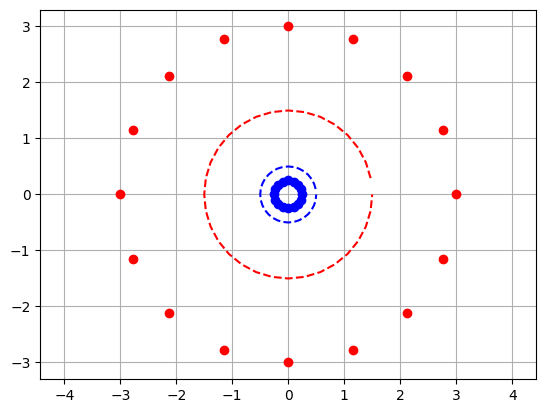

In [15]:
plot_2d(Gamma1, Gamma2, source_points.gart1, source_points.gart2)

In [16]:
from gpbr.direct.common.boundary import Point2D


def generate_test_points(num_points, inner_radius, outer_radius):
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=True)
    radii = np.linspace(inner_radius, outer_radius, num_points)
    points = [Point2D(r * np.cos(angle), r * np.sin(angle)) for r, angle in zip(radii, angles)]
    return points

In [17]:
test_points = generate_test_points(30, 0.6, 1.5)


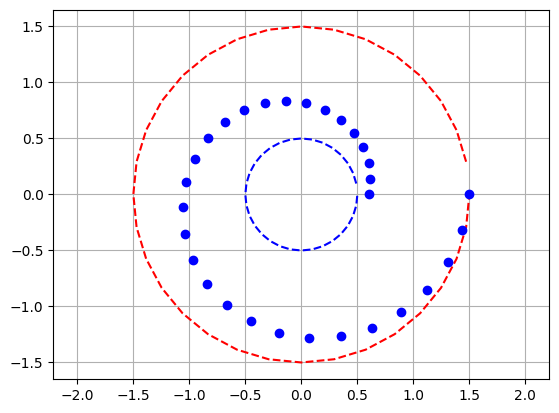

In [18]:
fig_plot, ax_plot = plt.subplots()
g1_x, g1_y = Gamma1.raw_points()
g2_x, g2_y = Gamma2.raw_points()
ax_plot.plot(g1_x, g1_y, 'b--')
ax_plot.plot(g2_x, g2_y, 'r--')
for tp in test_points:
    ax_plot.plot(tp.x,tp.y, 'bo')

ax_plot.axis('equal')
plt.grid()
plt.show()
plt.close()

In [19]:
assert False

AssertionError: 

In [16]:
from gpbr.direct.heat_equation.polynomial import MFSPolinomials2D, calculate_2d_polinomials

mfs_polynomyals = calculate_2d_polinomials(mfs_data, N)

In [17]:
from gpbr.direct.heat_equation.fundamental_sequence import fundamental_sequence_2d, FundamentalSequence

fundamental_sequence_gamma1 = fundamental_sequence_2d(Gamma1, source_points, mfs_data, mfs_polynomyals)
fundamental_sequence_gamma2 = fundamental_sequence_2d(Gamma2, source_points, mfs_data, mfs_polynomyals)

In [18]:
fundamental_sequence_gamma1

FundamentalSequence(M=8, phis=array([[[9.16020027e-05, 8.87309086e-06, 8.87309086e-06, 9.16020027e-05,
         3.34143799e-01, 8.79883994e-02, 8.79883994e-02, 3.34143799e-01],
        [1.61886227e-04, 2.65604475e-05, 5.81520719e-06, 2.65604475e-05,
         5.73547853e-01, 1.51948546e-01, 7.26286694e-02, 1.51948546e-01],
        [9.16020027e-05, 9.16020027e-05, 8.87309086e-06, 8.87309086e-06,
         3.34143799e-01, 3.34143799e-01, 8.79883994e-02, 8.79883994e-02],
        [2.65604475e-05, 1.61886227e-04, 2.65604475e-05, 5.81520719e-06,
         1.51948546e-01, 5.73547853e-01, 1.51948546e-01, 7.26286694e-02],
        [8.87309086e-06, 9.16020027e-05, 9.16020027e-05, 8.87309086e-06,
         8.79883994e-02, 3.34143799e-01, 3.34143799e-01, 8.79883994e-02],
        [5.81520719e-06, 2.65604475e-05, 1.61886227e-04, 2.65604475e-05,
         7.26286694e-02, 1.51948546e-01, 5.73547853e-01, 1.51948546e-01],
        [8.87309086e-06, 8.87309086e-06, 9.16020027e-05, 9.16020027e-05,
         8.7988

In [19]:
from gpbr.direct.common.boundary import Point2D, Point3D
from gpbr.direct.common.distance import point_distance


def f1(x: Point2D | Point3D , t):
    return 0

def f2(x: Point2D | Point3D, t: float) -> np.array:
    return (t**2)*np.exp(-4*t+2)*point_distance(x, Point2D(0,0))

In [20]:
from gpbr.direct.heat_equation.helpers import form_fs_matrix, form_fs_vector_2d
PHI_MAT = form_fs_matrix(fundamental_sequence_gamma1, fundamental_sequence_gamma2)
PHI_MAT.shape

(16, 8)

In [21]:
from gpbr.direct.heat_equation.fundamental_sequence import FundamentalSequenceCoefs

alpha_coeeff = np.empty((N+1, M), dtype=np.float64)
alpha_coeeff[:] = np.nan
fs_coefs = FundamentalSequenceCoefs(alpha_coeeff)

In [22]:
for n in range(0, N+1):
    F = form_fs_vector_2d(n,
                          fundamental_sequence_gamma1,
                          fundamental_sequence_gamma2,
                          Gamma1,
                          Gamma2,
                          fs_coefs,
                          f1, f2, mfs_data)
    from numpy.linalg import lstsq
    alpha_n = lstsq(PHI_MAT, F)[0]
    fs_coefs.alpha[n] = alpha_n.T
    print(fs_coefs.alpha)

[[ 4.62618774e+01  4.62618774e+01  4.62618774e+01  4.62618774e+01
  -9.03120339e-03 -9.03120339e-03 -9.03120339e-03 -9.03120339e-03]
 [            nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
   

C:\Users\Programmer\AppData\Local\Temp\ipykernel_16232\465525164.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  alpha_n = lstsq(PHI_MAT, F)[0]


In [23]:
from gpbr.direct.heat_equation.helpers import u_2d

In [26]:
x = Point2D(0,0.76)

In [29]:
u_2d(Point2D(0,0.5), source_points, fs_coefs, mfs_polynomyals, mfs_data)

-6987.6391162146365

In [24]:
assert False

AssertionError: 

In [ ]:
assert True

In [ ]:
for n in range(0, N+1):
    F = form_fs_vector_2d(n,
                          fundamental_sequence_gamma1,
                          fundamental_sequence_gamma2,
                          Gamma1,
                          Gamma2,
                          fs_coefs,
                          f1, f2, mfs_data)
    from numpy.linalg import lstsq
    alpha_n = lstsq(PHI_MAT, F)[0]
    fs_coefs.alpha[n] = alpha_n.T
    print(fs_coefs.alpha)

[[ 4.62618774e+01  4.62618774e+01  4.62618774e+01  4.62618774e+01
  -9.03120339e-03 -9.03120339e-03 -9.03120339e-03 -9.03120339e-03]
 [            nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
   